In [6]:
import os
import torch
import clip
from PIL import Image
from annoy import AnnoyIndex


In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


def get_image_embedding(image_path):
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image).float()

    embedding_flat = image_features.squeeze().numpy()
    return embedding_flat

In [ ]:
folder_path = os.path.join(os.getcwd(), "Testbilder")

index = AnnoyIndex(512, 'angular')

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    embedding = get_image_embedding(image_path)
    index.add_item(index.get_n_items(), embedding)

index.build(10)

index.save("test_pictures.ann")

In [ ]:
index.load("test_pictures.ann")



0.9258231520652771

In [26]:
image_path = os.path.join(os.getcwd(), "pexels-photo-106685.jpeg")
embedding = get_image_embedding(image_path)
index=index.get_nns_by_vector(embedding, 1)



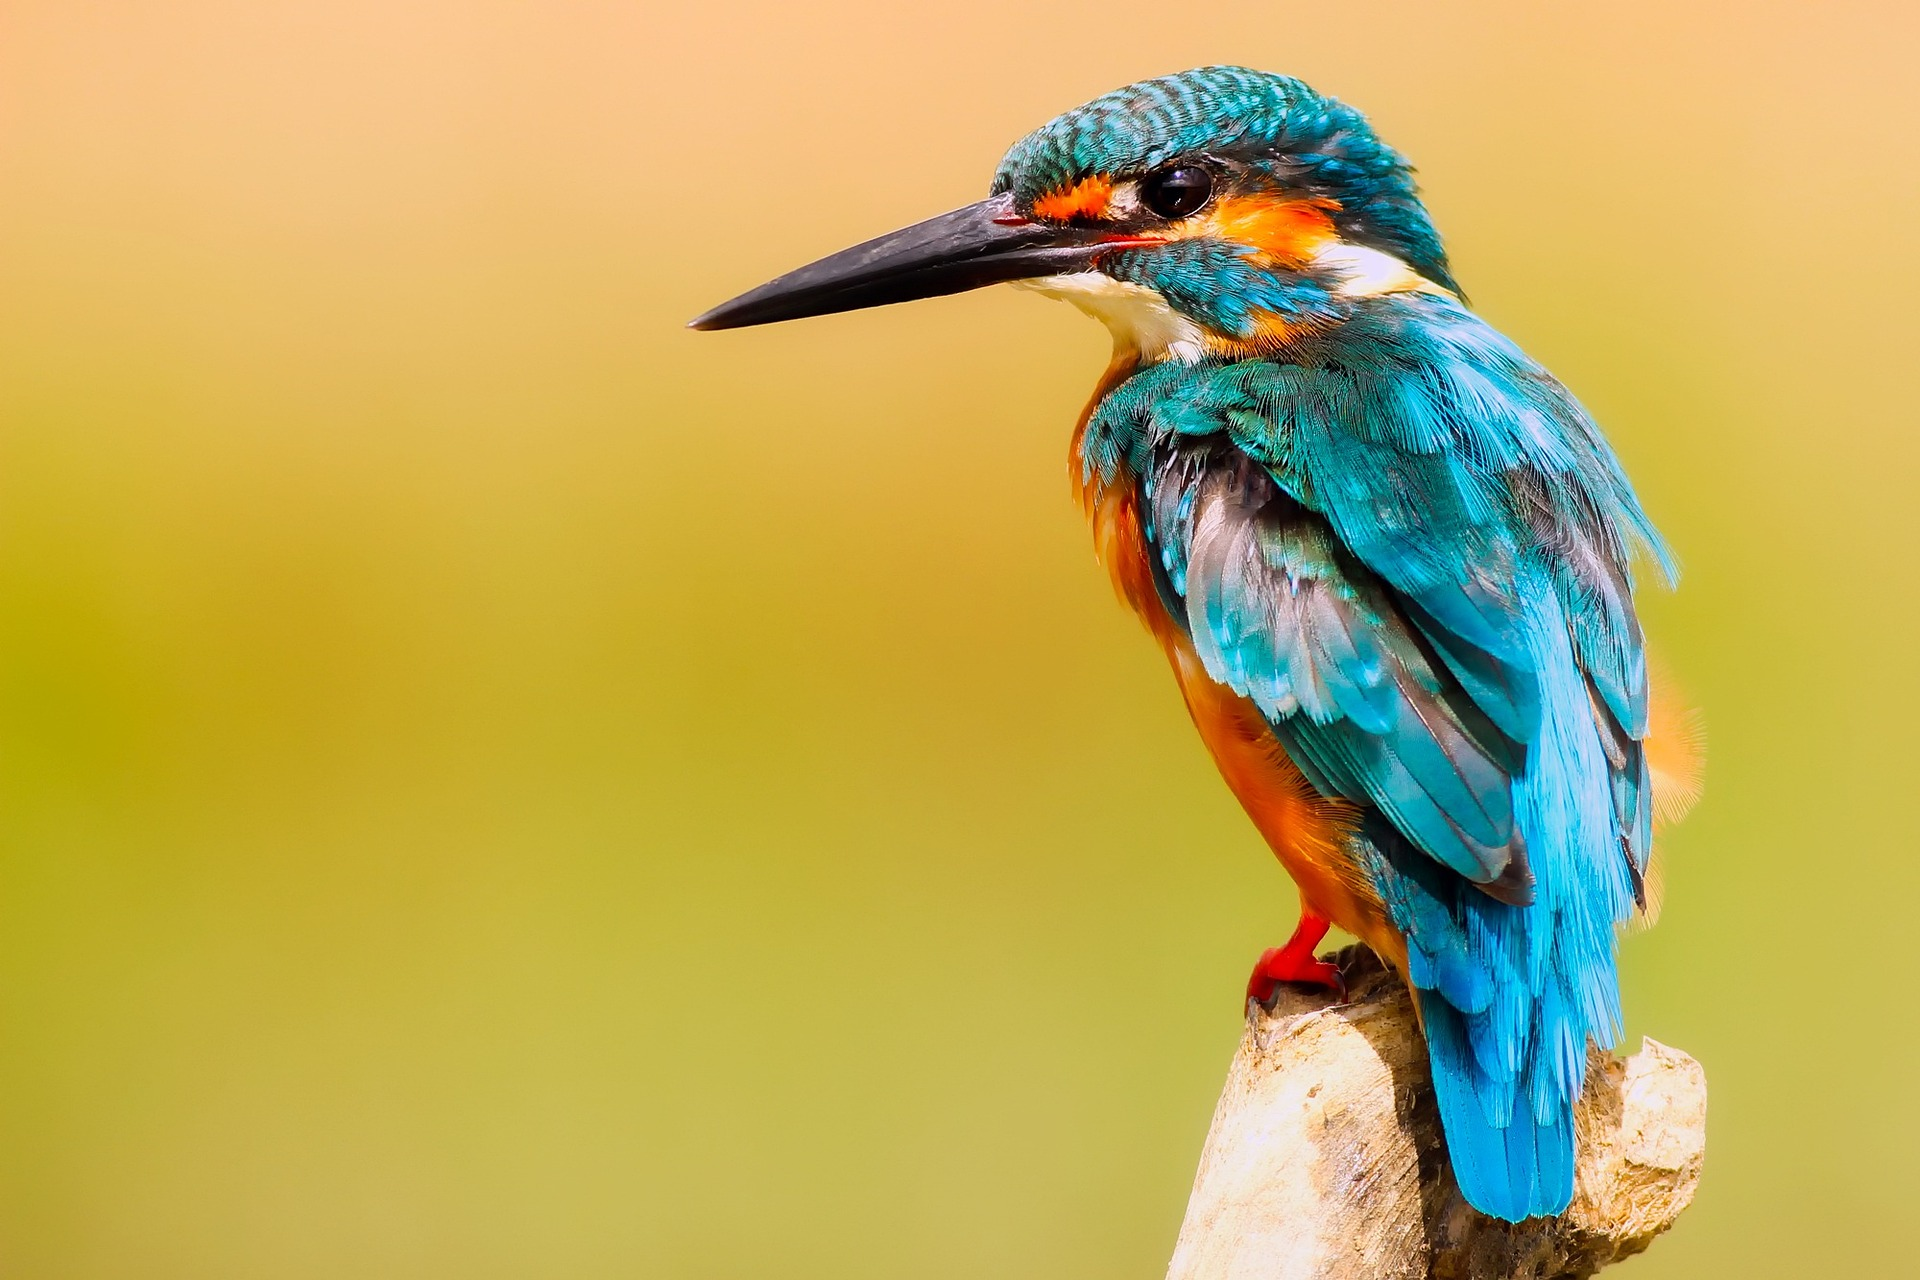

In [28]:
img_path = os.listdir(folder_path)[index[0]]

Image.open(os.path.join(folder_path, img_path))
